# Visualisation tutorial

In the [`introductory_tutorial`](introductory_tutorial.ipynb) we ran through building structural covariance network analyses using `scona`🍪.

In this tutorial we'll cover some of the visualisation tools to communicate these results.

Click on any of the links below to jump to that section
* [Get set up](#Get-set-up) (make sure to run this section before jumping into any of the others!)
* [Visualise the degree distribution: `plot_degree`](#Visualise-the-degree-distribution%3A-%3Ccode%3Eplot_degree%3C%2Fcode%3E)
* [Report the global measures of the graph: `report_global_measures`](#Report-the-global-measures-of-the-graph%3A-%3Ccode%3Ereport_global_measures%3C%2Fcode%3E)
* [Describe the rich club](#Describe-the-rich-club): `plot_rich_club`

## Get set up

You need to run this section for all of the different examples in the notebook.
So even if you want to skip to a section further down, make sure you've executed the next two code cells!

### Import the modules you need

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

### Read in the data, build a network and calculate the network metrics

If you're not sure about this step, please check out the [`introductory_tutorial`](introductory_tutorial.ipynb) notebook for more explanation.

In [2]:
# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# Threshold G at cost 10 to create a binary graph with 10% as many edges as the complete graph G.
G10 = G.threshold(10)

# Create a GraphBundle object that contains the G10 graph called "original_graph"
bundleGraphs = scn.GraphBundle([G10], ["original_graph"])

# Add ten random graphs to this bundle
# (In real life you'd want more than 10 random graphs,
# but this step can take quite a long time to run so 
# for the demo we just create 10)
bundleGraphs.create_random_graphs("original_graph", 10)

        Creating 10 random graphs - may take a little while


---
## Visualise the degree distribution: `plot_degree`

The degree of each node is the number of edges adjacent to the node.
For example if a node is connected to four other nodes then its degree is 4.
If it is connected to 50 other nodes, its degree is 50.

Brain networks are usually ["scale-free"](https://en.wikipedia.org/wiki/Scale-free_network) which means that their degree distribution follows a power law.
You can think of them as having a "heavy tail": there are a small number of nodes that have a large number of connections.

This is in contrast to - for example - an Erdős–Rényi graph where each node is connected to the others with a set, random probability.
This graph is often called a [binomial graph](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) because the probability of connections follows a binomial (Yes-No) distribution.

One of the first things to check for the structural covariance network analysis with `scona` is that our degree distribution shows this pattern.

### Look at the data

The degree distribution is already saved in the `G10` graph object.
Let's spend a few moments showing how you can access that information.

You can make a dictionary of the node ids (the dictionary key) and their degree (the dictionary value).

In [3]:
degrees = dict(G10.degree())

# Print the degree of every 50th node to show what's inside this dictionary
for node_id, degree in list(degrees.items())[::50]:
    print ('Node: {:3d} has degree = {:2d}'.format(node_id, degree))

Node:   0 has degree = 47
Node:  50 has degree = 16
Node: 100 has degree = 80
Node: 150 has degree =  9
Node: 200 has degree = 11
Node: 250 has degree = 37
Node: 300 has degree = 25


You can see the information for a specific node from the graph itself.

Although note that the degree needs to be calculated.
It hasn't been added to the attributes yet.

In [4]:
# Display the nodal attributes
G10.nodes[150]

{'centroids': array([-37.400137,  -8.593707,   4.436389]),
 'name': 'lh_insula_part3',
 'x': -37.400137,
 'y': -8.593707,
 'z': 4.436389}

`scona` has a command for that.
Lets go ahead and add the degree to the nodal attributes....along with a few other measures.

In [5]:
# Calculate nodal measures for graph G10
G10.calculate_nodal_measures()

# Display the nodal attributes
G10.nodes[150]

{'betweenness': 0.0011242664849842761,
 'centroids': array([-37.400137,  -8.593707,   4.436389]),
 'closeness': 0.39308578745198464,
 'clustering': 0.5277777777777778,
 'degree': 9,
 'module': 1,
 'name': 'lh_insula_part3',
 'participation_coefficient': 0.0,
 'shortest_path_length': 2.5357142857142856,
 'x': -37.400137,
 'y': -8.593707,
 'z': 4.436389}

Look at all that information!

We only want to visualise the degree distribution at the moment though.

### Import the code you need: `plot_degree_dist`

In [6]:
# import the function to plot network measures
from scona.visualisations import plot_degree_dist

### Plot the degree distribution

We only need the BrainNetwork graph to plot the degree distribution.

#### Default settings

By default we add an Erdős–Rényi random graph that has the same number of nodes as our BrainNetwork Graph for comparison.
The default colours are blue for the degree distribution of the real graph and a grey line for the random graph.

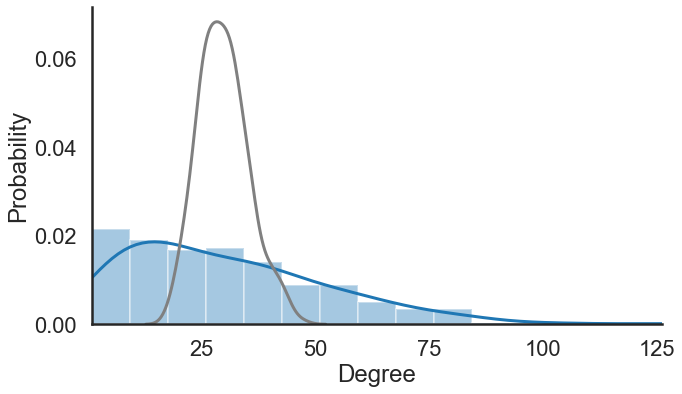

In [7]:
plot_degree_dist(G10)

#### Without the random graph

The random graph is a good sanity check that your degree distribution is not random...but it rather swamps the plot.
So this example allows you to plot only the degree distribution of the real graph, without the random graph.

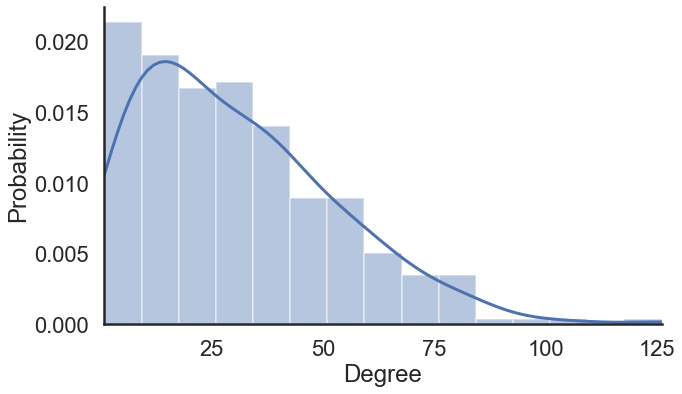

In [8]:
plot_degree_dist(G10, binomial_graph=False)

#### Save the plot

You can save this figure in any location.

You can do that by passing a file name and (optional) directory path to the `figure_name` option. 
If you don't set a directory path the figure will be saved in the local directory.

For this tutorial we'll save the output in a `figures` folder inside this `tutorials` directory.

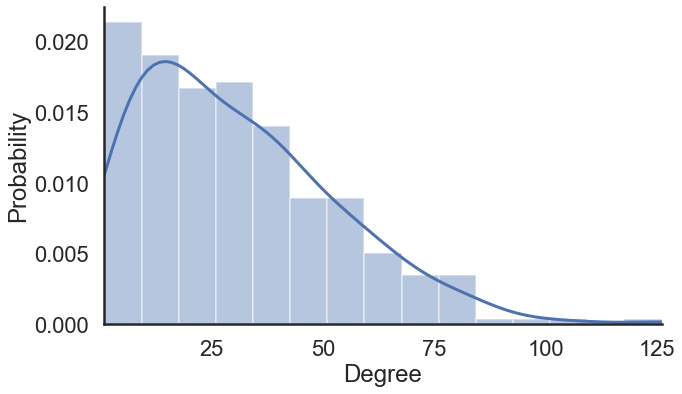

In [9]:
plot_degree_dist(G10, binomial_graph=False, figure_name="figures/DegreeDistribution.png")

☝️ Did you see an error message?

The code checks to see if the directory that you want to save your figure to actually exists.
If it doesn't then it creates the directory, but gives you a little warning first to check that it isn't coming as a surprised (for example if you have tried to save your figure in the wrong place!)

We have the `tutorials/figures` directory specifically ignored in this project so we shouldn't ever see changes there.

**Run the cell above again**.
You won't see the error the second time because the folder already exists!
You made it the first time you plotted the distribution 🚀. 

Note that if you don't pass a file ending the file will be saved as a `png` by default.

If you add a file extension allowed by `matplotlib` (eg `.jpg`, `.svg`, `.pdf` etc) then the figure will be saved in that format.

#### Change the colours

You can pass a pair of colours to the `plot_degree_dist` function.

The first colour is that of the histogram for the real graph.

The second colour is the line for the Erdős-Rényi graph.

In the example below, we've chosen red and black 🎨

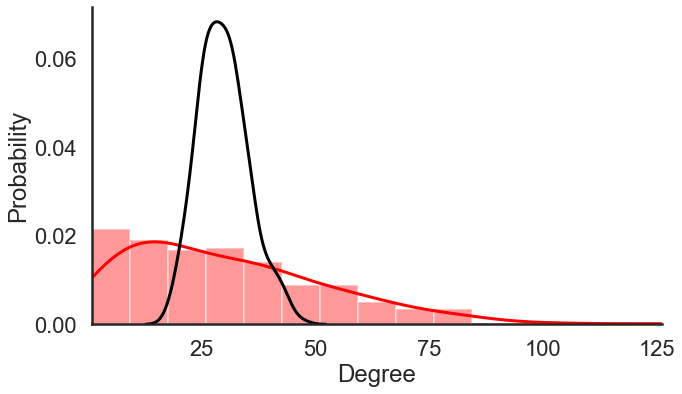

In [10]:
plot_degree_dist(G10, color=["red", "black"])

---
## Report the global measures of the graph: `report_global_measures`

One of the first things we want to know are how the global attributes of the network compare to those of random networks.

Specifically we'll calculate:

* `a`: assortativity  
* `C`: clustering  
* `E`: efficiency  
* `L`: shortest path  
* `M`: modularity
* `sigma`: small world coefficient

and plot a bar chart that compares the real network to the random graphs.

### Calculate the global measures

In [11]:
# Calculate the global measures
bundleGraphs_measures = bundleGraphs.report_global_measures()

# Show the dataframe so we can see the measures
display(bundleGraphs_measures)

,assortativity,average_clustering,average_shortest_path_length,efficiency,modularity
original_graph,0.090769,0.449889,2.376243,0.479840,0.382855
original_graph_R0,-0.102068,0.219788,2.080714,0.520110,0.123303
original_graph_R1,-0.071482,0.231650,2.095224,0.518189,0.124748
original_graph_R2,-0.071040,0.225841,2.092220,0.518284,0.123636
original_graph_R3,-0.087703,0.235077,2.086827,0.519114,0.128907
original_graph_R4,-0.109297,0.233794,2.078070,0.520494,0.127050
original_graph_R5,-0.059538,0.225421,2.088519,0.518883,0.127603
original_graph_R6,-0.065209,0.240020,2.090169,0.518684,0.121728
original_graph_R7,-0.077531,0.224615,2.089936,0.518559,0.127585
original_graph_R8,-0.083345,0.231111,2.086129,0.519186,0.127136


Now you have everything to plot the **network measures** of the BrainNetwork Graph and compare these measures to random measures values obtained from 10 random graphs stored inside the graph bundle `bundleGraphs`. 

### Import the code you need: `plot_network_measures`

In [12]:
# import the function to plot network measures
from scona.visualisations import plot_network_measures

### Plot the measures

There are 2 required parameters for the `plot_network_measures` function:  

1. a `GraphBundle` object (e.g. `bundleGraphs`)
2. the name of the *real graph* in your `GraphBundle` (e.g. `"original_graph"`)

#### Default settings

The default colours are blue and grey, and by default the error bars show 95% confidence intervals.

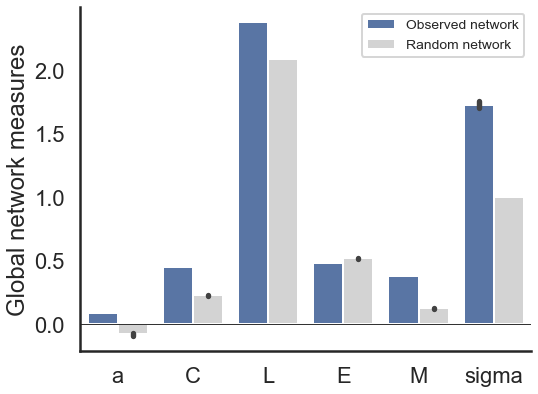

In [13]:
plot_network_measures(bundleGraphs, original_network="original_graph")

#### Save the figure

You'll probably want to save the beautiful figure you've made! 

You can do that by passing a file name and (optional) directory path to the `figure_name` option. 
If you don't set a directory path the figure will be saved in the local directory.

For this tutorial we'll save the output in a `figures` folder inside this `tutorials` directory.

For fun, we'll also adjust the colours to make the real network orange (`#FF4400`) and the random network turquoise (`#00BBFF`).

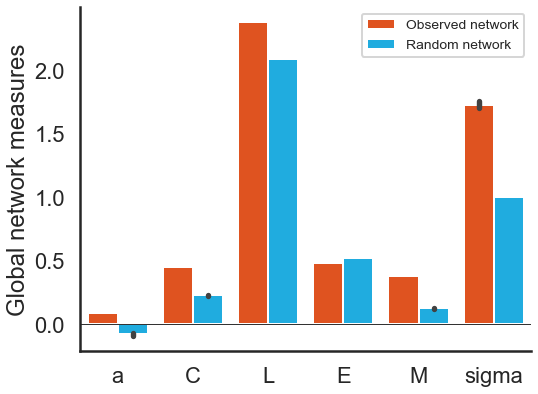

In [14]:
plot_network_measures(bundleGraphs, "original_graph",
                      figure_name="figures/NetworkMeasuresDemo",
                      color=["#FF4400", "#00BBFF"])

#### Hide the legend

You might not want to show the legend.
That's fine!

We'll also use this example to save an `svg` file.

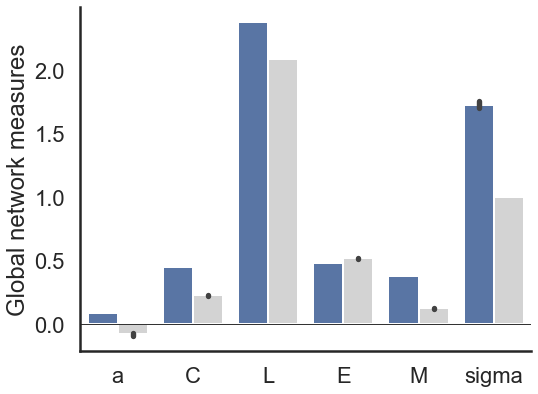

In [15]:
plot_network_measures(bundleGraphs, "original_graph",
                      figure_name="figures/NetworkMeasuresDemoNoLegend.svg",
                      show_legend=False)

#### Only show the original graph

You might not want to show the random graphs.

In this case you have to create a new graph bundle that only contains the real graph, and pass that to the `plot_network_measures` function.

For this example we've also changed the colour to green (to show off 😉).

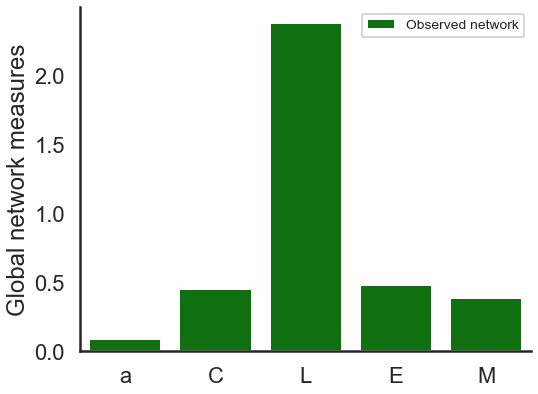

In [16]:
# Create a new graph bundle
realBundle = scn.GraphBundle([G10], ["original_graph"])

plot_network_measures(realBundle,
                      original_network = "original_graph",
                      color=["green"])

#### Change the type of error bars

The variance of measures obtained from random graphs is - by default - shown as the 95% confidence interval.

They're calculated by bootstrapping the random graphs.
There's more information in the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html) if you're curious.

But you don't have to calculate them.
You can plot the standard deviations instead if you'd prefer.
(These are a bit larger than the 95% confidence intervals so they're a bit easier to see in the plot below.)

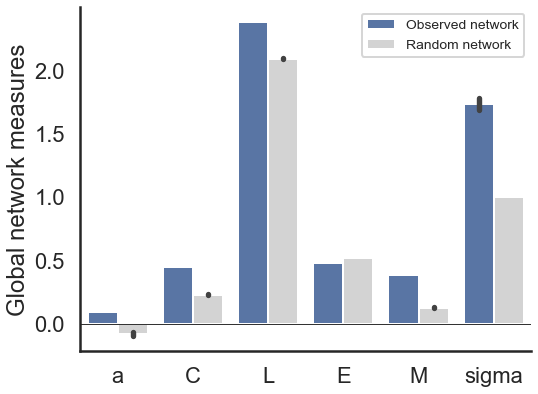

In [17]:
plot_network_measures(bundleGraphs,
                      original_network="original_graph",
                      ci="sd")

Alternatively you could show the 99% confidence interval.

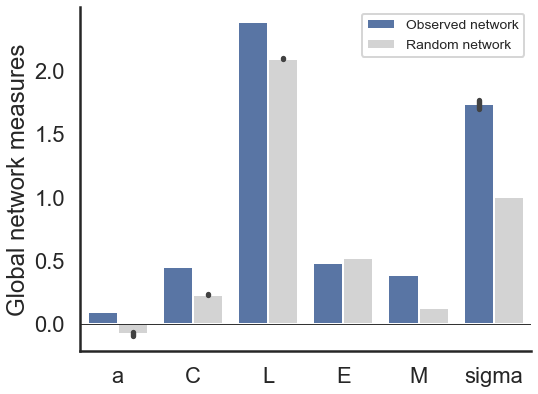

In [18]:
plot_network_measures(bundleGraphs, original_network="original_graph",
                      ci=99)

### Run with 100 random graphs

You can't publish results with 10 random graphs.
These don't give meaningful variations.
So let's add 90 more random graphs.

(This still isn't enough, but much better than 10!
We'd recommend that you run 1000 random graphs for publication quality results.)

This takes some time (around 5 minutes) so the cell below is commented out by default.
Remove the `#` at the start of each of the lines below to run the commands yourself.

In [19]:
#bundleGraphs.create_random_graphs("original_graph", 90)
#print (len(bundleGraphs))

Congratulations! 🎉

You created additional 90 random graphs, to give you a total of 100 random graphs and 1 real graph, and you managed to answer to some of your emails while waiting.

Here's a beautiful plot of your network measures with 95% confidence intervals....which you can't see because the random networks are all so similar to each other 🤦

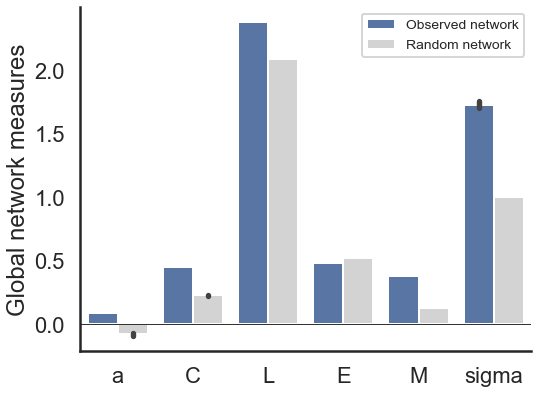

In [20]:
plot_network_measures(bundleGraphs, original_network="original_graph")

------------------------------------------------------------------

## Describe the rich club

Brain networks often have a ["rich club"](https://en.wikipedia.org/wiki/Rich-club_coefficient#Definition).
The rich club is a measure of the extent to which nodes in the graph with the highest degree (the largest number of connections) are preferentially connected to other highly connected nodes.

This network measure is fantastically named because a rich club exists in so many other networks too.

* Popular people in a social network are likely to be friends with each other.
* Wealthy people are likely to trade with each other.
* Major airports have lots of flights between each other.

In the brain, the "hubs" of the network - the high degree nodes - may also be the ones coordinating complex actions, and so they need to connect with each other to efficiently send messages to different specialised regions.

One thing that's a little confusing is that
- to plot the rich club values per degree along with the random rich club values created from Random Networks with a preserved degree distribution

### Report the rich club coefficients

The rich club coefficient is calculated as a function of a "cut off" degree.

$\phi(k) = \frac{2 E_k}{N_k (N_k - 1)}$

So the first thing to do is calculate the rich club coefficient ($\phi$) for all possible values of $k$.

In [21]:
# Calculate the rich club coefficients and then write them a data frame
rich_club_df = bundleGraphs.report_rich_club()

# Show the first few entries in the data frame
display(rich_club_df.iloc[:5, :6])

# Show the last few entries in the data frame
display(rich_club_df.iloc[-5:, :6])

,original_graph,original_graph_R0,original_graph_R1,original_graph_R2,original_graph_R3,original_graph_R4
0,0.100004,0.100004,0.100004,0.100004,0.100004,0.100004
1,0.103228,0.103228,0.103228,0.103228,0.103228,0.103228
2,0.107244,0.107175,0.107175,0.107175,0.107175,0.107175
3,0.112039,0.111920,0.111920,0.111920,0.111920,0.111920
4,0.117842,0.117564,0.117589,0.117564,0.117564,0.117564


,original_graph,original_graph_R0,original_graph_R1,original_graph_R2,original_graph_R3,original_graph_R4
101,1.0,1.0,1.0,0.0,1.0,1.0
102,1.0,1.0,1.0,0.0,1.0,1.0
103,1.0,1.0,1.0,0.0,1.0,1.0
104,1.0,1.0,1.0,0.0,1.0,1.0
105,1.0,1.0,1.0,0.0,1.0,1.0


The index column in the data frame above is the cut off degree value.

You may be wondering where `105` comes from!

The answer is in figuring out what the smallest and most highly connected sub-graph would be.
Logically that would be the connection between the two nodes that have the highest and second highest degree.

Take a look at the top five degree values for the`original_graph`:

In [22]:
# Show the degree of the 5 most connected nodes
display (G10.report_nodal_measures().sort_values(by='degree',
                                               ascending=False).loc[:, ['name', 'degree']].head())

,name,degree
278,rh_superiorparietal_part1,126
280,rh_superiorparietal_part3,106
4,lh_caudalmiddlefrontal_part2,95
190,rh_lateraloccipital_part6,91
37,lh_lateraloccipital_part7,84


The two most connected nodes in our graph have degree `126` and `106`.

So the maximum degree cut off must be `105` otherwise we'd be left with a single node by themselves!

### Visualise the rich club coefficient

You can see from the data frames above that for very low degree cut-off values the rich club coefficient in the real graph is very similar to that of the random graphs.

When we only consider the highest possible connections, the random and the real graphs have either a rich club coefficient of exactly 1 (the maximum value) or 0 (the minimum value).
This comes from the fact that we've maintained the degree distribution for every node, but switched *which* nodes the edges connect.

Both of these observations makes sense!
* The _whole_ graph can't be a member of the rich club: by definition it has to be a separate group of highly connected nodes.
* If you get rid of a huge number of nodes (by cutting off the graph at a very high degree threshold) then you'll either have all or none of the connections between the highly connected nodes.

The most interesting information is therefore in the middle of the dataframe!
And that's where our visualisation is really helpful.

### Import the code you need: `plot_rich_club`

In [23]:
# import the function to plot rich club values
from scona.visualisations import plot_rich_club

### Plot the rich club

The rich club doesn't make much sense unless you compare it to random graphs, so we pass a BrainBundle and the name of the original network.

#### Default settings

The default colours are blue for the real graph and grey for the random graph, with lighter grey for the confidence interval of the random graphs.

We don't save the plot by default.

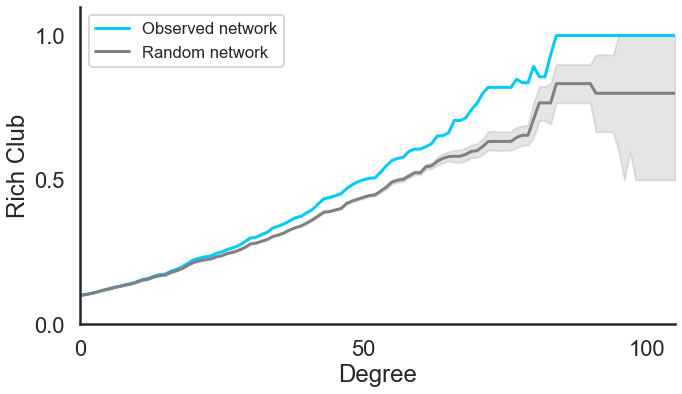

In [24]:
plot_rich_club(bundleGraphs, original_network="original_graph")

#### Save the figure

Passing a file name and (optional) directory path to the `figure_name` option. 
If you don't set a directory path the figure will be saved in the local directory.

In this case we've given the figure a `.jpg` suffix.
(By default the figures are usually saved as `.png`.)

For fun, we'll also adjust the colours to make the real network cornflower blue (`#6495ed`) and the random network coral (`#ff7f50`). (Thank you Alex, Liberty and Chris H at Neurohackademy 2019 for the suggestions!)

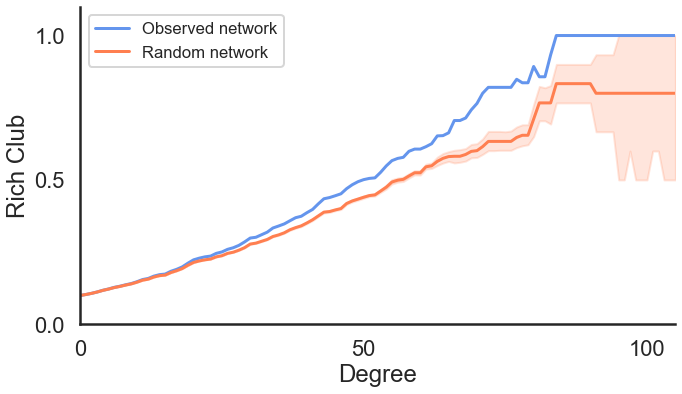

In [25]:
plot_rich_club(bundleGraphs,
               original_network="original_graph",
               figure_name="figures/RichClub.jpg",
               color=["#6495ed", "#ff7f50"])

#### Hide the legend

If you don't want to show the legend, that's easy to do.....although it seems slightly odd... to not tell folks what's going on 🤷


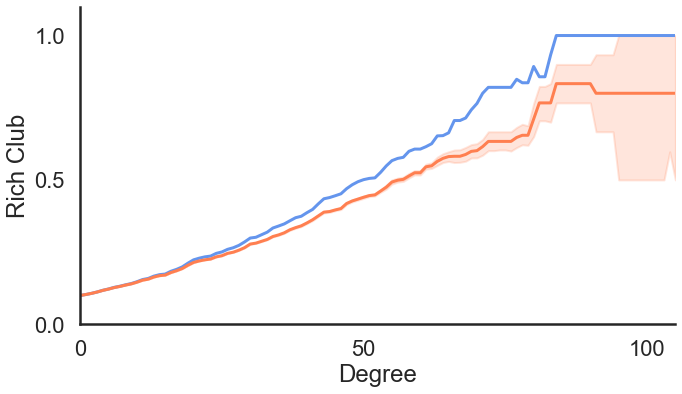

In [26]:
plot_rich_club(bundleGraphs,
               original_network="original_graph",
               figure_name="figures/RichClub.jpg",
               color=["#6495ed", "#ff7f50"],
               show_legend=False)

#### Adjust the x and y axis values

The axes always start at (0,0) and by default the maximum values are set according to the data.
The maximum degree on the x axis and 1.1 on the y axis.
(The maximum rich club value is 1.0 but adding a little extra space at the top looks good.)

You aren't likely to need to change the y axis values, but you might have a time when you want to specifically set the maximum value for the x axis, for example if you want to compare two networks on two different plots and have them have the same dimensions.

`scona` has an option for that!

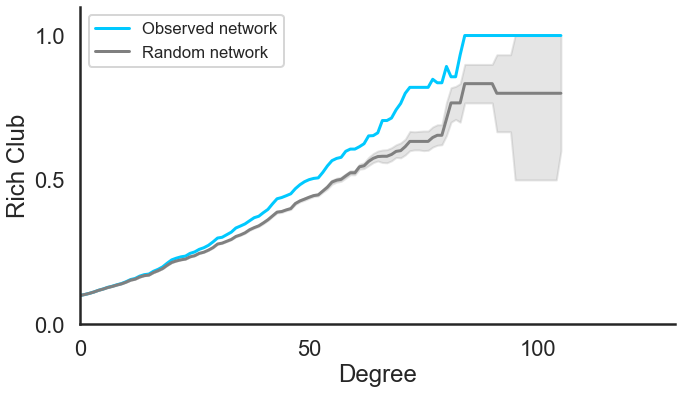

In [27]:
plot_rich_club(bundleGraphs,
               original_network="original_graph",
               x_max=130)

Yeah, it looks slightly strange that the rich club curve stops early, but at least you'd be able to compare it to a different plot.

----------------------

## Thank you!

That's all we have for this demo.
We hope it's been useful.